In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from tqdm import tqdm
from mimicry_ravi_v6_good_demo import update
from IPython.display import HTML
from matplotlib.collections import EllipseCollection

In [23]:
# Initialize population parameters
num_predators = 100
num_venomous_prey = 100
num_mimics = 100
d = 2

mutation_rate = 0.001

In [24]:
# predators_detectors_initial_mean = np.array([1 / np.sqrt(2), 1 / np.sqrt(2)])
# predators_detectors_initial_cov = 0.2**2 * np.eye(d)

# venomous_signals_initial_mean = np.array([1, 0])
# venomous_signals_initial_cov = 0.2**2 * np.eye(d)

# mimic_signals_initial_mean = np.array([0, 1])
# mimic_signals_initial_cov = 0.2**2 * np.eye(d)

predators_detectors_initial_mean = np.array([1, 0])
predators_detectors_initial_cov = 0.2**2 * np.eye(d)

venomous_signals_initial_mean = np.array([0, 1])
venomous_signals_initial_cov = 0.2**2 * np.eye(d)

mimic_signals_initial_mean = np.array([-0.5, -0.5])
mimic_signals_initial_cov = 0.2**2 * np.eye(d)

Text(0.5, 1.0, 'Initial distributions ($d=2$)')

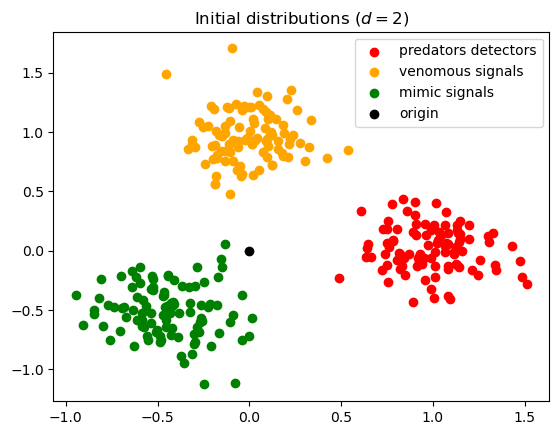

In [25]:
detectors =         np.random.multivariate_normal(mean=predators_detectors_initial_mean,
                                                  cov=predators_detectors_initial_cov,
                                                  size=num_predators)
venomous_signals =  np.random.multivariate_normal(mean=venomous_signals_initial_mean,
                                                  cov=venomous_signals_initial_cov,
                                                  size=num_venomous_prey)
mimic_signals =     np.random.multivariate_normal(mean=mimic_signals_initial_mean,
                                                  cov=mimic_signals_initial_cov,
                                                  size=num_mimics)
signals = np.vstack((venomous_signals, mimic_signals))

risk_tols = np.random.exponential(scale=0.5, size=num_predators)
venom_levels = np.concatenate((np.random.uniform(0.9, 1., size=num_venomous_prey), np.zeros(num_mimics)))

plt.scatter(detectors[:, 0], detectors[:, 1], color='red', label='predators detectors')
plt.scatter(signals[:num_venomous_prey, 0], signals[:num_venomous_prey, 1], color='orange', label='venomous signals')
plt.scatter(signals[num_venomous_prey:, 0], signals[num_venomous_prey:, 1], color='green', label='mimic signals')
plt.scatter(0, 0, color='k', label='origin')
plt.legend()
plt.title('Initial distributions ($d=2$)')

In [26]:
num_generations = 200
detectors_history    = []
signals_history      = []
risk_tols_history    = []
venom_levels_history = []
num_venomous_history = []

detectors_history.append(detectors)
signals_history.append(signals)
risk_tols_history.append(risk_tols)
venom_levels_history.append(venom_levels)
num_venomous_history.append(num_venomous_prey)

for t in tqdm(range(num_generations-1)):
    print(f'Gen {t}')
    d, s, r, v, nv = update(detectors_history[t], signals_history[t], risk_tols_history[t], venom_levels_history[t], num_venomous_history[t], 
                            mutation_rate=mutation_rate, 
                            handling_time=1/2, attack_rate=1, 
                            venomous_base_reproduction_rate=2, venomous_competition_coeff=0.01,
                            mimic_base_reproduction_rate=2, mimic_competition_coeff=0.01,
                            predator_conversion_rate=3, predator_competition_coeff=0.01,
                            phenotype_type='vector')
    detectors_history.append(d)
    signals_history.append(s)
    risk_tols_history.append(r)
    venom_levels_history.append(v)
    num_venomous_history.append(nv)

100%|██████████| 199/199 [00:00<00:00, 1805.84it/s]

Gen 0
predators left: 100
venomous left: 100
mimics left: 100
Gen 1
predators left: 100
venomous left: 100
mimics left: 100
Gen 2
predators left: 100
venomous left: 100
mimics left: 100
Gen 3
predators left: 100
venomous left: 100
mimics left: 100
Gen 4
predators left: 100
venomous left: 100
mimics left: 100
Gen 5
predators left: 100
venomous left: 100
mimics left: 100
Gen 6
predators left: 100
venomous left: 100
mimics left: 100
Gen 7
predators left: 100
venomous left: 100
mimics left: 100
Gen 8
predators left: 100
venomous left: 100
mimics left: 100
Gen 9
predators left: 100
venomous left: 100
mimics left: 100
Gen 10
predators left: 100
venomous left: 100
mimics left: 100
Gen 11
predators left: 100
venomous left: 100
mimics left: 100
Gen 12
predators left: 100
venomous left: 100
mimics left: 100
Gen 13
predators left: 100
venomous left: 100
mimics left: 100
Gen 14
predators left: 100
venomous left: 100
mimics left: 100
Gen 15
predators left: 100
venomous left: 100
mimics left: 100
Ge

In [27]:
steps_per_frame = 1
fig = plt.figure(figsize=(4,4))
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))
def animate(i):
    # Remove old points
    for artist in ax.get_lines()+ax.collections:  
        artist.remove()

    t = i * steps_per_frame
    pts = []
    ax.scatter(detectors_history[t][:, 0], detectors_history[t][:, 1], color='red', label='predators detectors', s=0.2)
    # ax.scatter(signals_history[t, :num_venomous_prey, 0], signals_history[t, :num_venomous_prey, 1], color='orange', label='venomous signals', s=0.2)
    ax.scatter(signals_history[t][:num_venomous_history[t], 0], signals_history[t][:num_venomous_history[t], 1], c=venom_levels_history[t][:num_venomous_history[t]], cmap='copper', vmin=0., vmax=1., label='venomous signals', s=0.2)
    ax.scatter(signals_history[t][num_venomous_history[t]:, 0], signals_history[t][num_venomous_history[t]:, 1], color='green', label='mimic signals', s=0.2)
    # ax.scatter(0, 0, color='k', label='origin')

    # ax.add_collection(EllipseCollection(widths=2*risk_tols_history[t], heights=2*risk_tols_history[t],
    #                                     offsets=detectors_history[t], transOffset=ax.transData, units='xy',
    #                                     angles=0, facecolors='red', alpha=0.1))

    # pts.append(pt1, pt2, pt3, pt4)

    return ax.collections

anim = animation.FuncAnimation(fig, animate, frames=len(detectors_history)//steps_per_frame, interval=50, blit=True)
plt.close()
anim.save('test.gif')
HTML(anim.to_jshtml())
    

MovieWriter ffmpeg unavailable; using Pillow instead.
